<h1 style="color: blue;">나. Albumentations</h1>

 Albumentations는 이미지 데이터 증강(Image Augmentation)을 위한 파이썬 라이브러리입니다. 이 라이브러리는 다양한 변환(Transform) 기법을 제공하여 데이터 증강을 쉽게 할 수 있도록 도와줍니다.

 Albumentations는 다른 데이터 증강 라이브러리에 비해 높은 속도와 효율성을 제공합니다. 이는 Cython으로 작성되어 있고, OpenCV 및 NumPy와 같은 빠른 이미지 처리 라이브러리를 사용하기 때문입니다.

<h2 style="color: green;">이미지 증강 간단 실습</h2>

In [11]:
import random
import cv2
import albumentations as A
from matplotlib import pyplot as plt

In [55]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

# 바운딩 박스 그리기 함수 
def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    #왼쪽 상단 모서리 좌표, 우측 하단 모서리 좌표, 색상, 두께 지정해줘서 bbox 시각화
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    #-1로 설정된 thickness는 사각형을 채우는 역할을 하며, BOX_COLOR로 지정된 색상으로 사각형 내부가 채워집니다.
    
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

# 시각화 함수 
def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [56]:
# 이미지 읽기 
image = cv2.imread('../data/01.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [57]:
# 해당 박스 정보
# 원래는 json 파일에서 읽어오는 것임
bboxes = [[3.96, 183.38, 200.88, 214.03], [468.94, 92.01, 171.06, 248.45]]
category_ids = [0, 1]


# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
# 클래스 정보 
category_id_to_name = {0: 'cat', 1: 'dog'}

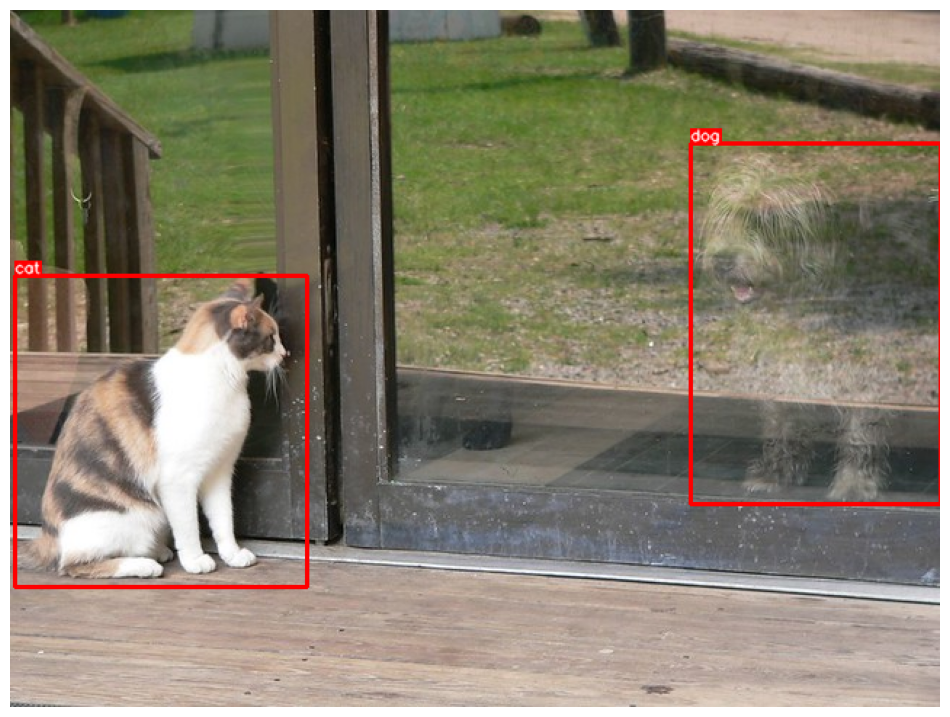

In [58]:
# Visuaize the original image with bounding boxes
visualize(image, bboxes, category_ids, category_id_to_name)

<h2 style="color: green;">좌우 반전 실습</h2>

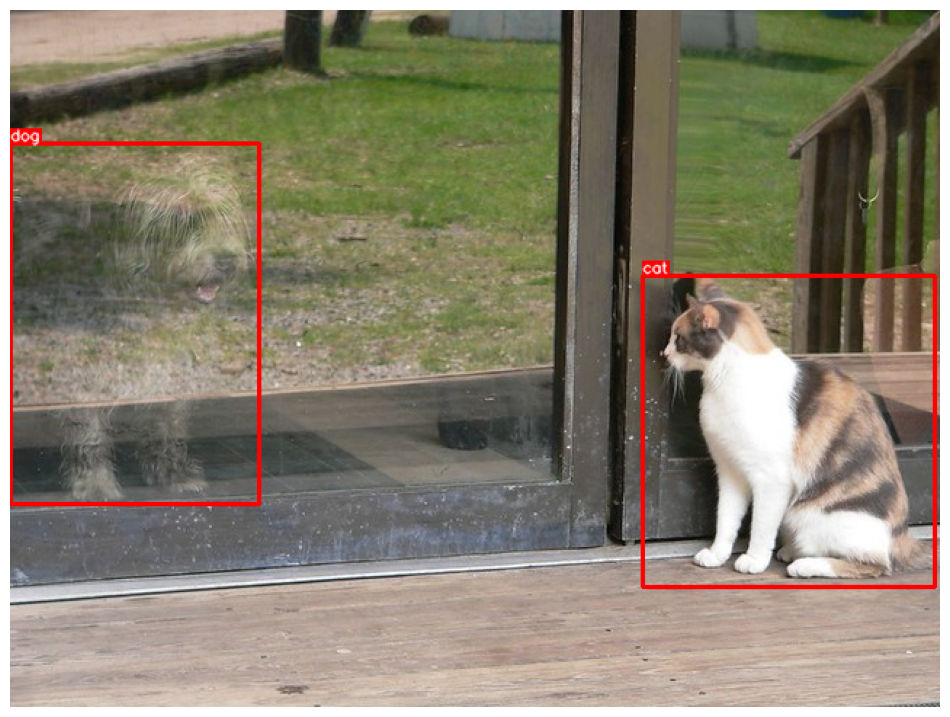

In [59]:
# 좌우 반전 진행 실습 
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
    #BboxParams를 사용하면 입력 이미지와 함께 주어진 바운딩 박스들을 자동으로 변환하여 동기화할 수 있습니다.
)

random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

<h2 style="color: green;">shiftScaleRotate를 이용한 회전</h2>

ShiftScaleRotate는 Albumentations 라이브러리에서 제공하는 augmentation 중 하나로, 이미지를 이동, 회전 및 크기 조정하는 기능을 수행합니다.
이미지의 크기를 변경하거나 이동 및 회전을 수행하면 이미지가 일부분이 잘리거나 비어있을 수 있습니다. 
이를 방지하기 위해 Albumentations는 기본적으로 이미지 크기를 유지하도록 알고리즘을 설계하였습니다.

이 augmentation은 다양한 매개변수를 제공합니다. shift_range는 이미지를 수평 및 수직 방향으로 이동시키는 범위를 지정하고, 
scale_range는 이미지의 크기를 조정하는 범위를 지정합니다. rotate_range는 이미지를 회전시키는 범위를 지정합니다.
또한, 이 augmentation은 대상 이미지의 크기와 같은 모양의 결과를 반환하는 것이 아니라, 대상 이미지와 다른 크기의 출력 이미지를 생성할 수 있습니다.
이를 위해, ShiftScaleRotate는 padIfNeeded 및 cropIfNeeded 함수와 함께 사용되는 경우가 많습니다.
이 함수들은 원래 이미지와 동일한 크기의 이미지를 만들기 위해 필요한 패딩 또는 크롭을 수행합니다.

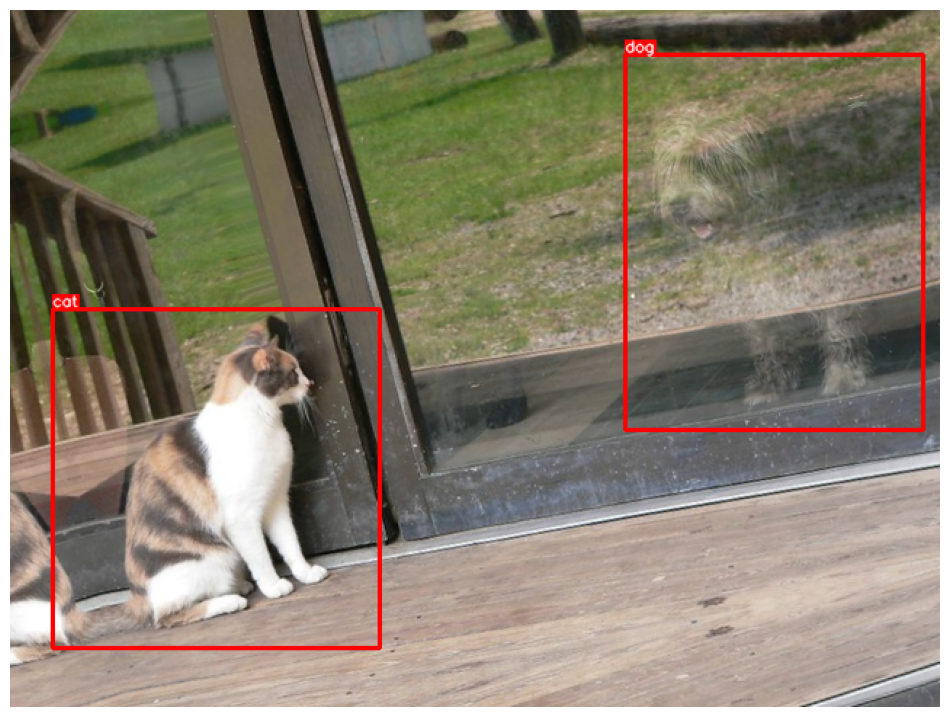

In [62]:
# shiftScaleRotate

transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)
#rotate_limit=(-30, 30) -> -30에서 30사이에 각도로 랜덤하게 실행

random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

<h2 style="color: green;">복잡한 Augmentation 파이프라인 정의하기</h2>

여러 개의 이미지 변환 기법을 조합하여 데이터 증강 파이프라인을 만들 수 있습니다. 이를 통해 모델이 다양한 시각적 변형에 대해 강건하게 만들 수 있습니다. 아래는 예제로 제공된 복잡한 데이터 증강 파이프라인입니다.

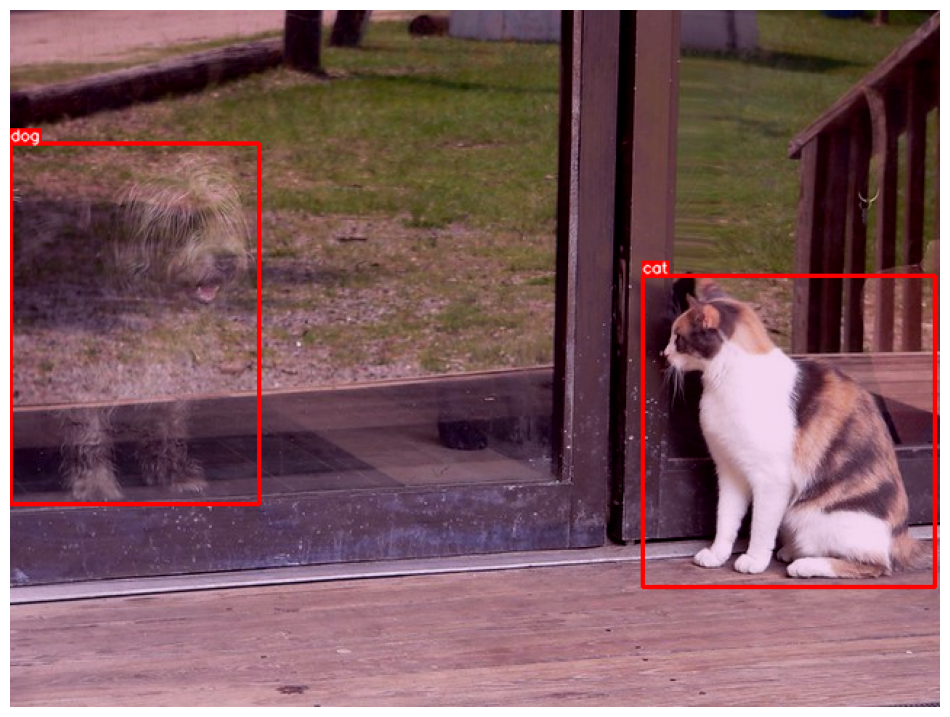

In [63]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

<h2 style="color: green;">공간적 보강 실습</h2>

공간적 보강(spatial augmentations)을 적용하면 바운딩 박스의 크기가 변경될 수 있습니다. 예를 들어 이미지 일부를 자르거나 이미지 크기를 조정할 때 바운딩 박스의 크기가 변경될 수 있습니다.

min_area 및 min_visibility 매개변수는 보강 후 바운딩 박스의 크기가 변경되었을 때 Albumentations가 바운딩 박스에 대해 수행해야 할 작업을 제어합니다.

min_area는 픽셀 단위의 값입니다. 보강 후 바운딩 박스의 면적이 min_area보다 작아지면, Albumentations는 해당 박스를 삭제합니다. 따라서 반환된 보강된 바운딩 박스 목록은 해당 바운딩 박스를 포함하지 않습니다.

min_visibility는 0과 1 사이의 값입니다. 보강 후 바운딩 박스의 면적과 보강 전 바운딩 박스의 면적의 비율이 min_visibility보다 작아지면, Albumentations는 해당 박스를 삭제합니다. 따라서 보강 과정에서 대부분의 바운딩 박스가 잘리면, 해당 박스는 반환된 보강된 바운딩 박스 목록에 포함되지 않습니다.

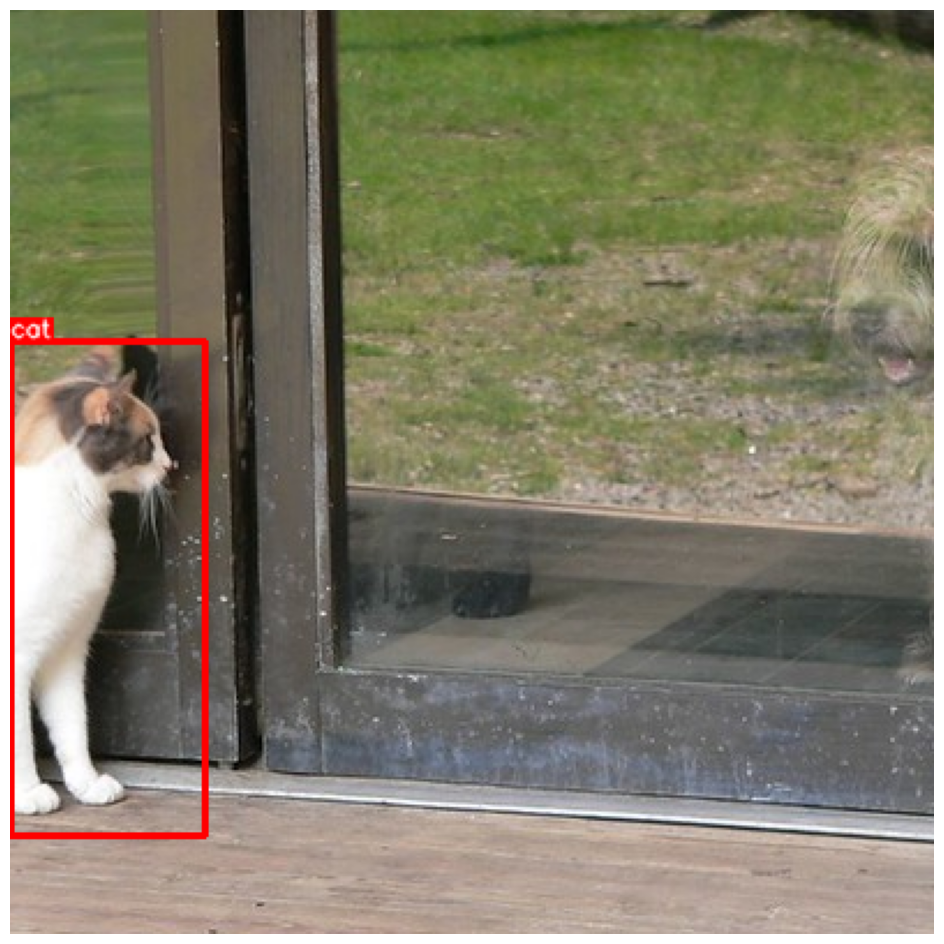

In [76]:
transform = A.Compose(
    [A.CenterCrop(height=400, width=400, p=1)],
    bbox_params=A.BboxParams(format='coco', min_area=15000, label_fields=['category_ids']),
    #15000보다 크기가 작아지면 바운딩 박스 삭제
)

transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)